In [1]:
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, utils

import matplotlib.pyplot as plt


In [2]:
matches=pd.read_csv('./data/PSL_2016-2020.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
Team_1              127 non-null object
Team_2              127 non-null object
Team1_Code          127 non-null object
Team2_Code          127 non-null object
Season              127 non-null int64
venue               127 non-null object
id                  127 non-null int64
Win_By_Wkts         127 non-null int64
Win_By_Runs         126 non-null float64
toss_winner         127 non-null object
toss_winner_code    127 non-null object
toss_decision       127 non-null object
result              127 non-null object
winner              127 non-null object
winner_code         127 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 15.0+ KB


In [3]:
matches.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2016,Dubai,1,8,0.0,ISLAMABAD UNITED,IU,field,normal,QUETTA GLADIATORS,QG
1,KARACHI KINGS,LAHORE QALANDARS,KK,LQ,2016,Dubai,2,7,0.0,KARACHI KINGS,KK,field,normal,KARACHI KINGS,KK
2,PESHAWAR ZALMI,ISLAMBAD UNITED,PZ,IU,2016,Dubai,3,0,24.0,PESHAWAR ZALMI,PZ,field,normal,PESHAWAR ZALMI,PZ
3,QUETTA GLADIATORS,KARACHI KINGS,QG,KK,2016,Dubai,4,8,0.0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
4,LAHORE QALANDARS,PESHAWAR ZALMI,LQ,PZ,2016,Dubai,5,9,0.0,PESHAWAR ZALMI,PZ,bat,normal,PESHAWAR ZALMI,PZ


In [4]:
matches.tail()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
122,LAHORE QALANDARS,ISLAMABAD UNITED,LQ,IU,2020,karachi,122,1,0.0,LAHORE QALANDARS,LQ,field,normal,ISLAMABAD UNITED,IU
123,MULTAN SULTANS,PESHAWAR ZALMI,MS,PZ,2020,karachi,123,6,0.0,PESHAWAR ZALMI,PZ,bat,normal,MULTAN SULTANS,MS
124,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2020,karachi,124,5,0.0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
125,MULTAN SULTANS,KARACHI KINGS,MS,KK,2020,karachi,125,0,52.0,KARACHI KINGS,KK,field,normal,MULTAN SULTANS,MS
126,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2020,karachi,124,5,0.0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG


In [5]:
matches[pd.isnull(matches['winner'])]

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code


In [6]:
encode = {'Team1_Code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'Team2_Code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'toss_winner_code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'winner_code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6,'MT':7,'MA':10},
         'toss_decision': {'field':1,'bat':2}}
matches.replace(encode,inplace=True)
matches.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,4,6,2016,Dubai,1,8,0.0,ISLAMABAD UNITED,4,1,normal,QUETTA GLADIATORS,6
1,KARACHI KINGS,LAHORE QALANDARS,1,2,2016,Dubai,2,7,0.0,KARACHI KINGS,1,1,normal,KARACHI KINGS,1
2,PESHAWAR ZALMI,ISLAMBAD UNITED,5,4,2016,Dubai,3,0,24.0,PESHAWAR ZALMI,5,1,normal,PESHAWAR ZALMI,5
3,QUETTA GLADIATORS,KARACHI KINGS,6,1,2016,Dubai,4,8,0.0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6
4,LAHORE QALANDARS,PESHAWAR ZALMI,2,5,2016,Dubai,5,9,0.0,PESHAWAR ZALMI,5,2,normal,PESHAWAR ZALMI,5


In [7]:
matches.describe()

,Team1_Code,Team2_Code,Season,id,Win_By_Wkts,Win_By_Runs,toss_winner_code,toss_decision,winner_code
count,127.000000,127.000000,127.000000,127.000000,127.000000,126.000000,127.000000,127.000000,127.000000
mean,3.543307,3.755906,2017.874016,63.685039,4.212598,8.325397,3.740157,1.259843,4.173228
std,1.641505,1.888632,1.247169,36.415525,5.207793,16.902937,1.778231,0.440285,1.881803
min,1.000000,1.000000,2016.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2017.000000,32.500000,0.000000,0.000000,2.000000,1.000000,3.000000
50%,4.000000,4.000000,2018.000000,64.000000,5.000000,0.000000,4.000000,1.000000,4.000000
75%,5.000000,5.500000,2019.000000,94.500000,7.000000,6.250000,5.000000,2.000000,6.000000
max,6.000000,6.000000,2020.000000,125.000000,50.000000,67.000000,6.000000,2.000000,10.000000


In [8]:
dicVal = encode['winner_code']
print(dicVal['KK']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
KK


In [9]:
matches = matches[['Team1_Code','Team2_Code','toss_winner_code','toss_decision','Win_By_Wkts','Win_By_Runs','winner_code']]
matches.head()

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,Win_By_Wkts,Win_By_Runs,winner_code
0,4,6,4,1,8,0.0,6
1,1,2,1,1,7,0.0,1
2,5,4,5,1,0,24.0,5
3,6,1,6,1,8,0.0,6
4,2,5,5,2,9,0.0,5


In [10]:
df = pd.DataFrame(matches)
df.describe()

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,Win_By_Wkts,Win_By_Runs,winner_code
count,127.000000,127.000000,127.000000,127.000000,127.000000,126.000000,127.000000
mean,3.543307,3.755906,3.740157,1.259843,4.212598,8.325397,4.173228
std,1.641505,1.888632,1.778231,0.440285,5.207793,16.902937,1.881803
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000
50%,4.000000,4.000000,4.000000,1.000000,5.000000,0.000000,4.000000
75%,5.000000,5.500000,5.000000,2.000000,7.000000,6.250000,6.000000
max,6.000000,6.000000,6.000000,2.000000,50.000000,67.000000,10.000000


In [11]:
temp1=df['toss_winner_code'].value_counts(sort=True)
temp2=df['winner_code'].value_counts(sort=True)
#'No of toss winners by each team'
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
PZ -> 33
QG -> 23
KK -> 23
IU -> 21
LQ -> 16
MS -> 11
No of match winners by each team
QG -> 30
PZ -> 28
IU -> 27
KK -> 18
MS -> 10
LQ -> 10
MA -> 2
MT -> 2


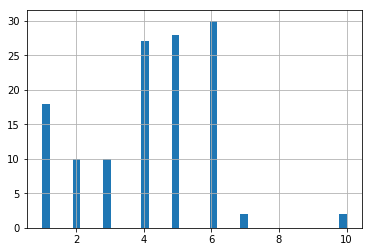

In [12]:
df['winner_code'].hist(bins=40)

Text(0.5, 1.0, 'Match winners')

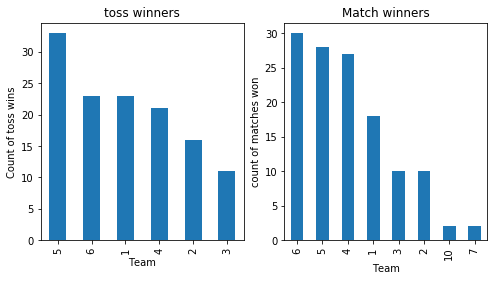

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [14]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

Team1_Code          0
Team2_Code          0
toss_winner_code    0
toss_decision       0
Win_By_Wkts         0
Win_By_Runs         1
winner_code         0
dtype: int64

In [15]:
df.shape
df.head(2)

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,Win_By_Wkts,Win_By_Runs,winner_code
0,4,6,4,1,8,0.0,6
1,1,2,1,1,7,0.0,1


In [16]:
df.isnull()

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,Win_By_Wkts,Win_By_Runs,winner_code
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [17]:
mean = df.mean(axis=0)
df-= mean
std = df.std(axis=0)
df /= std
df -= mean
df /= std

In [18]:
df.head()

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,Win_By_Wkts,Win_By_Runs,winner_code
0,-1.989084,-1.359552,-2.021129,-4.201851,-0.669255,-0.521681,-1.701811
1,-3.102447,-2.480965,-2.969864,-4.201851,-0.706127,-0.521681,-3.113768
2,-1.617963,-1.920259,-1.704884,-4.201851,-0.964228,-0.437679,-1.984202
3,-1.246842,-2.761318,-1.388639,-4.201851,-0.669255,-0.521681,-1.701811
4,-2.731326,-1.639906,-1.704884,0.956756,-0.632383,-0.521681,-1.984202


#  Identifying features and target

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


# Splitting train and test data

In [20]:


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.1) 

X_train.shape

(114, 6)

# Building models

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def model_():
    model = Sequential()

    model.add(Dense(10,input_shape=(X.shape[1],),activation='tanh'))
 
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mae'])

    model.summary()
    return model

Using TensorFlow backend.


# Fitting & validating model

In [ ]:
model = model_()
history = model.fit(X_train,y_train,epochs=8,validation_data = (X_test, y_test))


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()